INDICACIÓN: El preprocesado para sacar la columna de 'Juego' lo tengo que hacer desde Google Sheets con la función de filtro y a mano, por que hay vídeos de mi canal cuyo juego no está mencionado en el título, por lo cual no puedo sacar por Jupiter Notebooks los diferentes juegos de cada una de las filas (de cada uno de los videos). A su vez, he añadido la columna SEO para poner en función de cada juego cuanto sacaría de provecho el video en funcion de la demanda y la competitividad, pero ni el primero ni este último son útiles por que no correlan.

# PREPROCESAMIENTO

In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [449]:
data = pd.read_csv('data/raw/dataset siralatriste.csv')
data.head(1)

,Título del vídeo,Visualizaciones,Juego,SEO,Compartido,Tiempo de visualización (horas),Suscriptores,Impresiones,Me gusta (vs. No me gusta) (%),Me gusta,Duración media de las visualizaciones,Datos Duración media de las visualizaciones,Comentarios,Porcentaje de clics de las impresiones (%),Fecha
0,El ejército que nunca se rendía - El último te...,47210,Empire Total War,57.0,67,1580.8846,25,62129,87.19,279,2.0,0:02:00,39,8.69,"Mar 2, 2015"


## SACAR LA MEDIA DE MIS VARIABLES EN FUNCIÓN DEL JUEGO

In [450]:
#para sacar la media de compartidos de cada uno de mis juegos 
data['Med Juego Compartido'] = data.groupby('Juego')['Compartido'].transform('mean')

In [451]:
#para sacar la media de comentarios de cada uno de mis juegos 
data['Med Juego Comentarios'] = data.groupby('Juego')['Comentarios'].transform('mean')

In [452]:
#para sacar la media del porcentaje de likes/dislikes de cada uno de mis juegos
data['Med porcentaje likes/dislikes Juego'] = data.groupby('Juego')['Me gusta (vs. No me gusta) (%)'].transform('mean')

In [453]:
#para sacar la media de likes de cada uno de mis juegos
data['Med Likes x juego'] = data.groupby('Juego')['Me gusta'].transform('mean')

In [454]:
#para sacar la media de tiempo (en horas) de visualizacion de cada uno de mis juegos
data['Med Horas vistas Juego'] = data.groupby('Juego')['Tiempo de visualización (horas)'].transform('mean')

In [455]:
#para sacar la duracion media de (en minutos) de las visualizaciones hechas en cada uno de mis juegos
data['Med Duracion de Visualizaciones Juego'] = data.groupby('Juego')['Duración media de las visualizaciones'].transform('mean')

In [456]:
#para sacar la media de impresiones para cada uno de mis juegos
data['Med Impresiones Juego'] = data.groupby('Juego')['Impresiones'].transform('mean')

In [457]:
#para sacar la media de porcentaje de click de impresiones para cada uno de mis juegos
data['Med porcentaje clicks Impresiones Juego'] = data.groupby('Juego')['Porcentaje de clics de las impresiones (%)'].transform('mean')

In [458]:
#para sacar la media de visualizaciones para cada uno de mis juegos
data['Med Visualizaciones Juego'] = data.groupby('Juego')['Visualizaciones'].transform('mean')

In [459]:
#para sacar la media de suscriptores ganados en cada uno de los juegos
data['Med Suscriptores Juego'] = data.groupby('Juego')['Suscriptores'].transform('mean')

SUSTITUIR LA VARIABLE JUEGO POR NUMEROS ENTEROS

In [460]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Juego_int'] = le.fit_transform(data['Juego'])
data.head(2)

,Título del vídeo,Visualizaciones,Juego,SEO,Compartido,Tiempo de visualización (horas),Suscriptores,Impresiones,Me gusta (vs. No me gusta) (%),Me gusta,...,Med Juego Comentarios,Med porcentaje likes/dislikes Juego,Med Likes x juego,Med Horas vistas Juego,Med Duracion de Visualizaciones Juego,Med Impresiones Juego,Med porcentaje clicks Impresiones Juego,Med Visualizaciones Juego,Med Suscriptores Juego,Juego_int
0,El ejército que nunca se rendía - El último te...,47210,Empire Total War,57.0,67,1580.8846,25,62129,87.19,279,...,3.769231,32.165385,22.692308,123.856562,2.323077,5924.153846,3.209231,3685.923077,1.769231,5
1,Formación tortuga romana con legionarios - Rom...,36195,Rome 2 Total War,53.0,109,540.5963,42,162259,87.96,168,...,1.738462,70.030000,6.553846,14.001945,2.312308,4670.507692,2.230000,793.184615,0.784615,15


# VARIABLES NUEVAS PARA CUANDO SALGA UNA PALARA EN LOS STRINGS DE UNA COLUMNA SEA 1 Y CUANDO NO 0

In [461]:
data['Título_1'] = np.where(data['Título del vídeo'].str.contains("1"), 1 , 0) #PARA CUANDO UNA COLUMNA CONTIENE CIERTA PALABRA
#data[data['Título_1']==1]['Título del vídeo'].value_counts(normalize=True) #para contar dichos valores 1 o 0

In [462]:
data['Año'] = data['Fecha'].str.split().str[-1].astype('int') #para coger solo la última palabra y hacerlo numero entero
data.head(1)

,Título del vídeo,Visualizaciones,Juego,SEO,Compartido,Tiempo de visualización (horas),Suscriptores,Impresiones,Me gusta (vs. No me gusta) (%),Me gusta,...,Med Likes x juego,Med Horas vistas Juego,Med Duracion de Visualizaciones Juego,Med Impresiones Juego,Med porcentaje clicks Impresiones Juego,Med Visualizaciones Juego,Med Suscriptores Juego,Juego_int,Título_1,Año
0,El ejército que nunca se rendía - El último te...,47210,Empire Total War,57.0,67,1580.8846,25,62129,87.19,279,...,22.692308,123.856562,2.323077,5924.153846,3.209231,3685.923077,1.769231,5,1,2015


HABIENDO SACADO LOS AÑOS, VOY A SACAR LA MEDIA DE LAS VARIABLES QUE MÁS CORRELAN DE ESE AÑO COMO VARIABLE... SOLO SALE CON ALGO DE CORRELACIÓN LA DE VISULIZACIONES, ASÍ QUE ES LA ÚNICA QUE SE VE AQUÍ.

In [463]:

data['Med Visualizaciones Año'] = data.groupby('Año')['Visualizaciones'].transform('mean')

MEDIA DE SUSCRIPTORES POR VISUALIZACIÓN (PENDIENTE PORQUE AUNQUE DE 0.59 DE CORRELACIÓN ESTÁ CONDICIONADO POR VISUALIZACIONES)

In [464]:
#data['Med suscriptores por visualización'] = data.groupby('Visualizaciones')['Suscriptores'].transform('mean') #esta NO SE TOCA: es en función de las visualizaciones totales que tuvo el vídeo

In [465]:
data.head(1)

,Título del vídeo,Visualizaciones,Juego,SEO,Compartido,Tiempo de visualización (horas),Suscriptores,Impresiones,Me gusta (vs. No me gusta) (%),Me gusta,...,Med Horas vistas Juego,Med Duracion de Visualizaciones Juego,Med Impresiones Juego,Med porcentaje clicks Impresiones Juego,Med Visualizaciones Juego,Med Suscriptores Juego,Juego_int,Título_1,Año,Med Visualizaciones Año
0,El ejército que nunca se rendía - El último te...,47210,Empire Total War,57.0,67,1580.8846,25,62129,87.19,279,...,123.856562,2.323077,5924.153846,3.209231,3685.923077,1.769231,5,1,2015,1145.3


# REPRESENTACIÓN DE LA CORRELACIÓN DE VISUALIZACIONES CON TODAS LAS VARIABLES

C:\Users\Braulio\AppData\Local\Temp\ipykernel_17472\281730149.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr().abs(), annot=True);


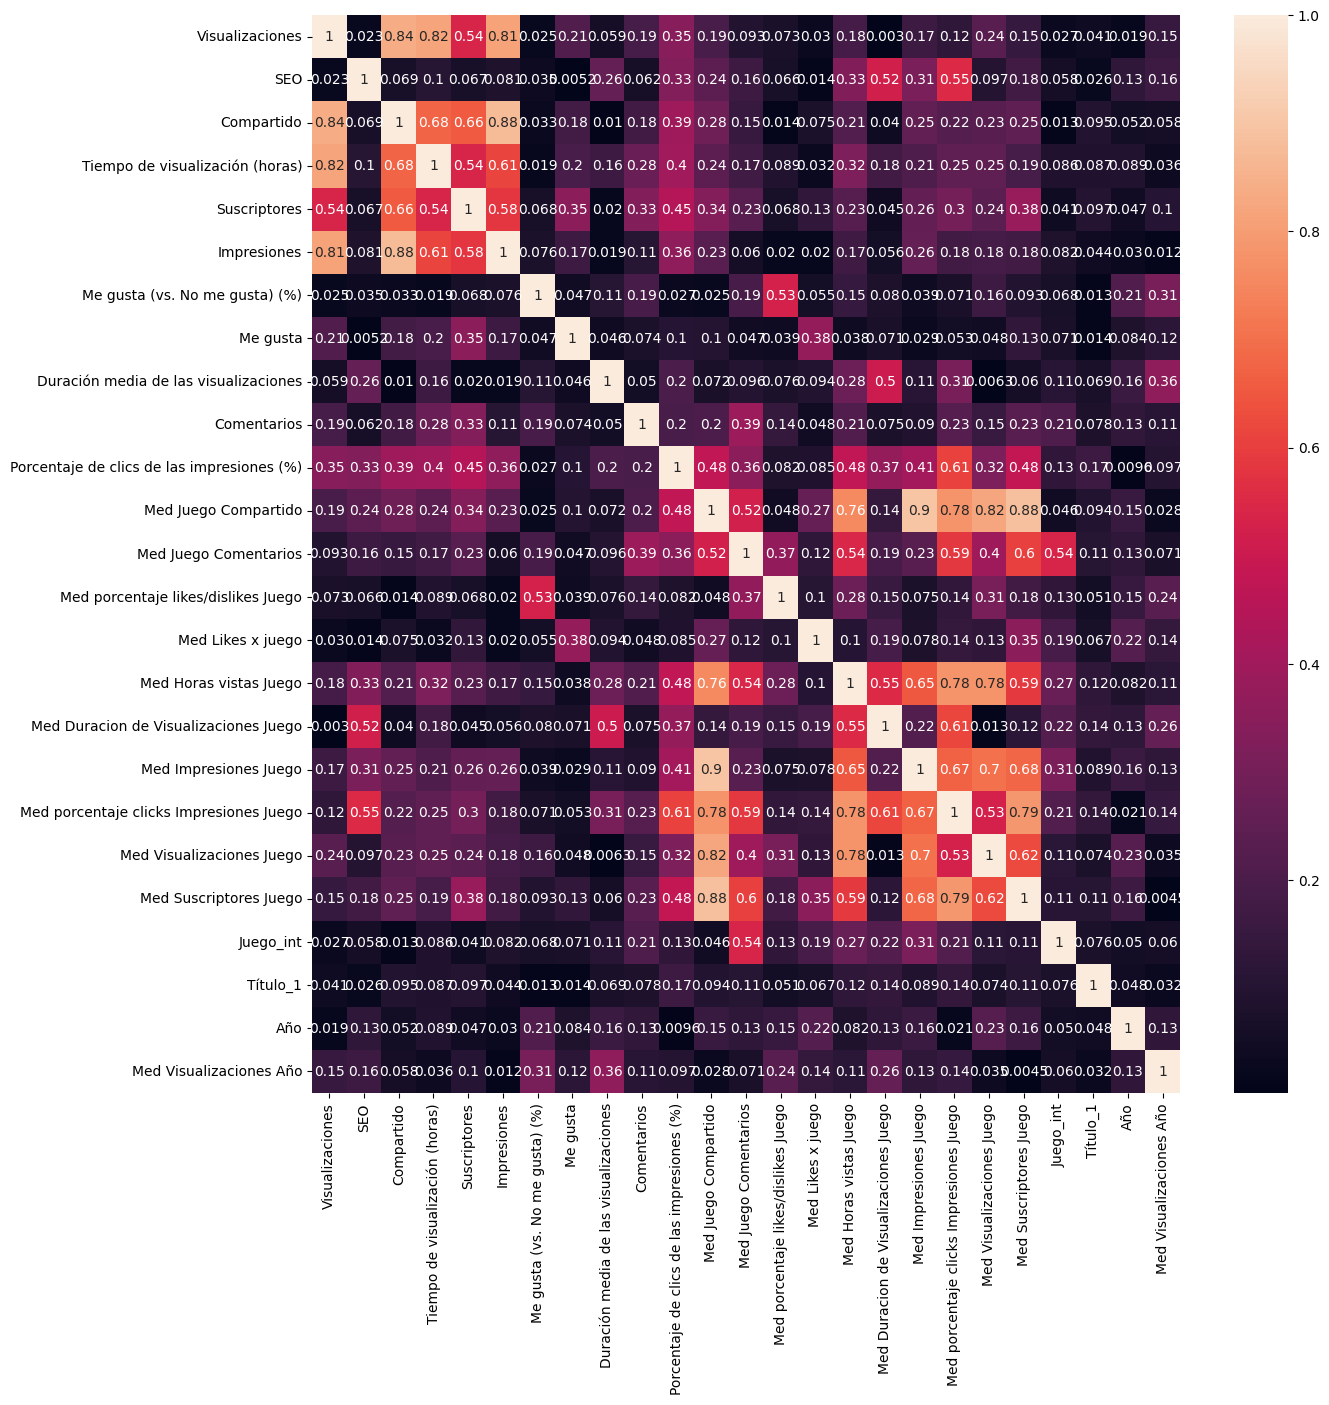

In [466]:
plt.figure(figsize= (14,14));
sns.heatmap(data.corr().abs(), annot=True);

In [474]:
corr = data.corr().abs() #para sacarlo con valores absolutos

C:\Users\Braulio\AppData\Local\Temp\ipykernel_17472\939750392.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().abs() #para sacarlo con valores absolutos


In [475]:
corr_visual = corr.loc[:,['Visualizaciones']] #para sacar las correlaciones de Visualizaciones
corr_visual.sort_values(ascending=False, by = 'Visualizaciones')

,Visualizaciones
Visualizaciones,1.000000
Med Visualizaciones Juego,0.235958
Me gusta,0.212741
Med Juego Compartido,0.194137
Comentarios,0.189833
Med Horas vistas Juego,0.184287
Med Impresiones Juego,0.165220
Med Visualizaciones Año,0.149292
Med Suscriptores Juego,0.146927
Med porcentaje clicks Impresiones Juego,0.124066


# ELIMINAR COLUMNAS INSERVIBLES O QUE NO VAYAN A PREDECIR CON 'SINCERIDAD' EL FUTURO AUNQUE TENGAN GRAN CORRELACIÓN.

ELIMINACIÓN DE VARIABLES QUE CORRELAN CON VISUALIZACIONES PERO NO SERÍAN FIELES TAN FIELES AL FUTURO

In [468]:
data.drop(columns=['Compartido', 'Tiempo de visualización (horas)', 'Suscriptores', 'Impresiones', 'Porcentaje de clics de las impresiones (%)'], inplace=True)

In [469]:
#data.head(1)

ELIMINACIÓN DE VARIABLES QUE NO CORRELAN CON VISUALIZACIONES

In [470]:
data.drop(columns=['SEO', 'Año', 'Juego_int','Título_1'], inplace=True)

# GUARDAR ARCHIVO PROCESADO, LIMPIADO.

In [471]:
# para guardar el DataFrame como archivo CSV
data.to_csv('data/processed.csv', index=False)